In [11]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [12]:
# Carregar dados
df = pd.read_csv('../data/raw/vendas_2025.csv')

print("📊 Dados carregados com sucesso!")
print(f"\n📏 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print("\n👀 Primeiras 5 linhas:")
df.head()

📊 Dados carregados com sucesso!

📏 Dimensões: 1000 linhas x 9 colunas

👀 Primeiras 5 linhas:


,ID_Pedido,Data,Produto,Categoria,Quantidade,Preco_Unitario,Regiao,Vendedor,Total_Venda
0,1849,2025-01-01,Monitor,Informática,2,800.0,Norte,Eduardo,1600.0
1,1678,2025-01-01,Mouse,Acessórios,1,80.0,Leste,Daniela,80.0
2,1649,2025-01-01,Mouse,Acessórios,2,80.0,Leste,Eduardo,160.0
3,1756,2025-01-01,Tablet,Eletrônicos,1,1200.0,Centro-Oeste,Ana,1200.0
4,1992,2025-01-01,Teclado,Acessórios,4,150.0,Centro-Oeste,Daniela,600.0


In [13]:
# Informações sobre o dataset
print("📋 Informações do Dataset:")
print(df.info())# Informações sobre o dataset
print("📋 Informações do Dataset:")
print(df.info())

📋 Informações do Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       1000 non-null   int64  
 1   Data            1000 non-null   str    
 2   Produto         1000 non-null   str    
 3   Categoria       1000 non-null   str    
 4   Quantidade      1000 non-null   int64  
 5   Preco_Unitario  1000 non-null   float64
 6   Regiao          1000 non-null   str    
 7   Vendedor        1000 non-null   str    
 8   Total_Venda     1000 non-null   float64
dtypes: float64(2), int64(2), str(5)
memory usage: 70.4 KB
None
📋 Informações do Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       1000 non-null   int64  
 1   Data            1000 non-null   str    
 2   Produto         

In [14]:
# Verificar dados faltantes
print("🔍 Valores nulos por coluna:")
print(df.isnull().sum())
print(f"\n📊 Total de valores nulos: {df.isnull().sum().sum()}")

🔍 Valores nulos por coluna:
ID_Pedido         0
Data              0
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Regiao            0
Vendedor          0
Total_Venda       0
dtype: int64

📊 Total de valores nulos: 0


In [15]:
# Estatísticas descritivas
print("📈 Estatísticas Descritivas:")
df.describe()

📈 Estatísticas Descritivas:


,ID_Pedido,Quantidade,Preco_Unitario,Total_Venda
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1500.500000,2.47000,1073.270000,2654.720000
std,288.819436,1.11998,1115.543834,3292.199979
min,1001.000000,1.00000,80.000000,80.000000
25%,1250.750000,1.00000,150.000000,320.000000
50%,1500.500000,2.00000,800.000000,1500.000000
75%,1750.250000,3.00000,1500.000000,3500.000000
max,2000.000000,4.00000,3500.000000,14000.000000


In [16]:
# 1. Converter a coluna 'Data' para datetime
df['data_venda'] = pd.to_datetime(df['Data'])

# 2. Criar coluna de valor total 
df['valor_total'] = df['Quantidade'] * df['Preco_Unitario']

# 3. Extrair informações temporais usando a nova coluna 'data_venda'
df['ano'] = df['data_venda'].dt.year
df['mes'] = df['data_venda'].dt.month
df['mes_nome'] = df['data_venda'].dt.month_name()
df['dia_semana'] = df['data_venda'].dt.day_name()
df['trimestre'] = df['data_venda'].dt.quarter

print("✅ Novas colunas criadas com sucesso usando os nomes reais do CSV!")
print("\n📊 Colunas atuais no DataFrame:")
print(df.columns.tolist())

✅ Novas colunas criadas com sucesso usando os nomes reais do CSV!

📊 Colunas atuais no DataFrame:
['ID_Pedido', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preco_Unitario', 'Regiao', 'Vendedor', 'Total_Venda', 'data_venda', 'valor_total', 'ano', 'mes', 'mes_nome', 'dia_semana', 'trimestre']


In [17]:
# Ver resultado
print(" Dados apos transformacao:")
df.head(10)

 Dados apos transformacao:


,ID_Pedido,Data,Produto,Categoria,Quantidade,Preco_Unitario,Regiao,Vendedor,Total_Venda,data_venda,valor_total,ano,mes,mes_nome,dia_semana,trimestre
0,1849,2025-01-01,Monitor,Informática,2,800.0,Norte,Eduardo,1600.0,2025-01-01,1600.0,2025,1,January,Wednesday,1
1,1678,2025-01-01,Mouse,Acessórios,1,80.0,Leste,Daniela,80.0,2025-01-01,80.0,2025,1,January,Wednesday,1
2,1649,2025-01-01,Mouse,Acessórios,2,80.0,Leste,Eduardo,160.0,2025-01-01,160.0,2025,1,January,Wednesday,1
3,1756,2025-01-01,Tablet,Eletrônicos,1,1200.0,Centro-Oeste,Ana,1200.0,2025-01-01,1200.0,2025,1,January,Wednesday,1
4,1992,2025-01-01,Teclado,Acessórios,4,150.0,Centro-Oeste,Daniela,600.0,2025-01-01,600.0,2025,1,January,Wednesday,1
5,1447,2025-01-01,Laptop,Informática,3,3500.0,Norte,Ana,10500.0,2025-01-01,10500.0,2025,1,January,Wednesday,1
6,1207,2025-01-02,Teclado,Acessórios,1,150.0,Norte,Daniela,150.0,2025-01-02,150.0,2025,1,January,Thursday,1
7,1264,2025-01-02,Teclado,Acessórios,4,150.0,Centro-Oeste,Carlos,600.0,2025-01-02,600.0,2025,1,January,Thursday,1
8,1064,2025-01-02,Laptop,Informática,2,3500.0,Sul,Ana,7000.0,2025-01-02,7000.0,2025,1,January,Thursday,1
9,1896,2025-01-03,Mouse,Acessórios,1,80.0,Centro-Oeste,Bruno,80.0,2025-01-03,80.0,2025,1,January,Friday,1


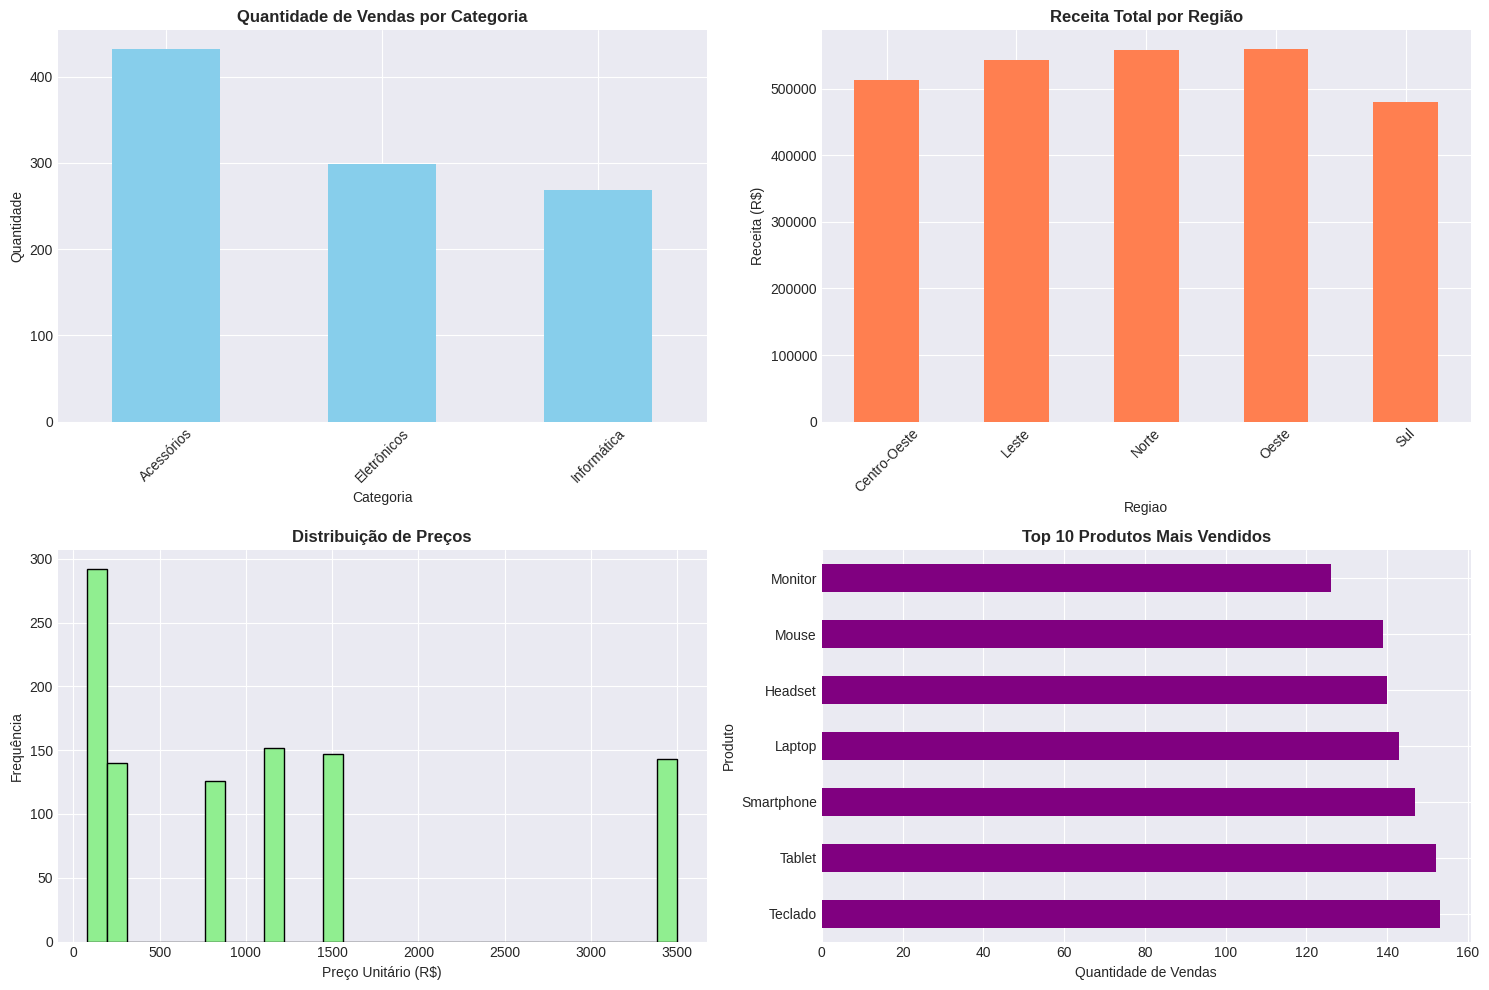

✅ Gráficos gerados com sucesso!


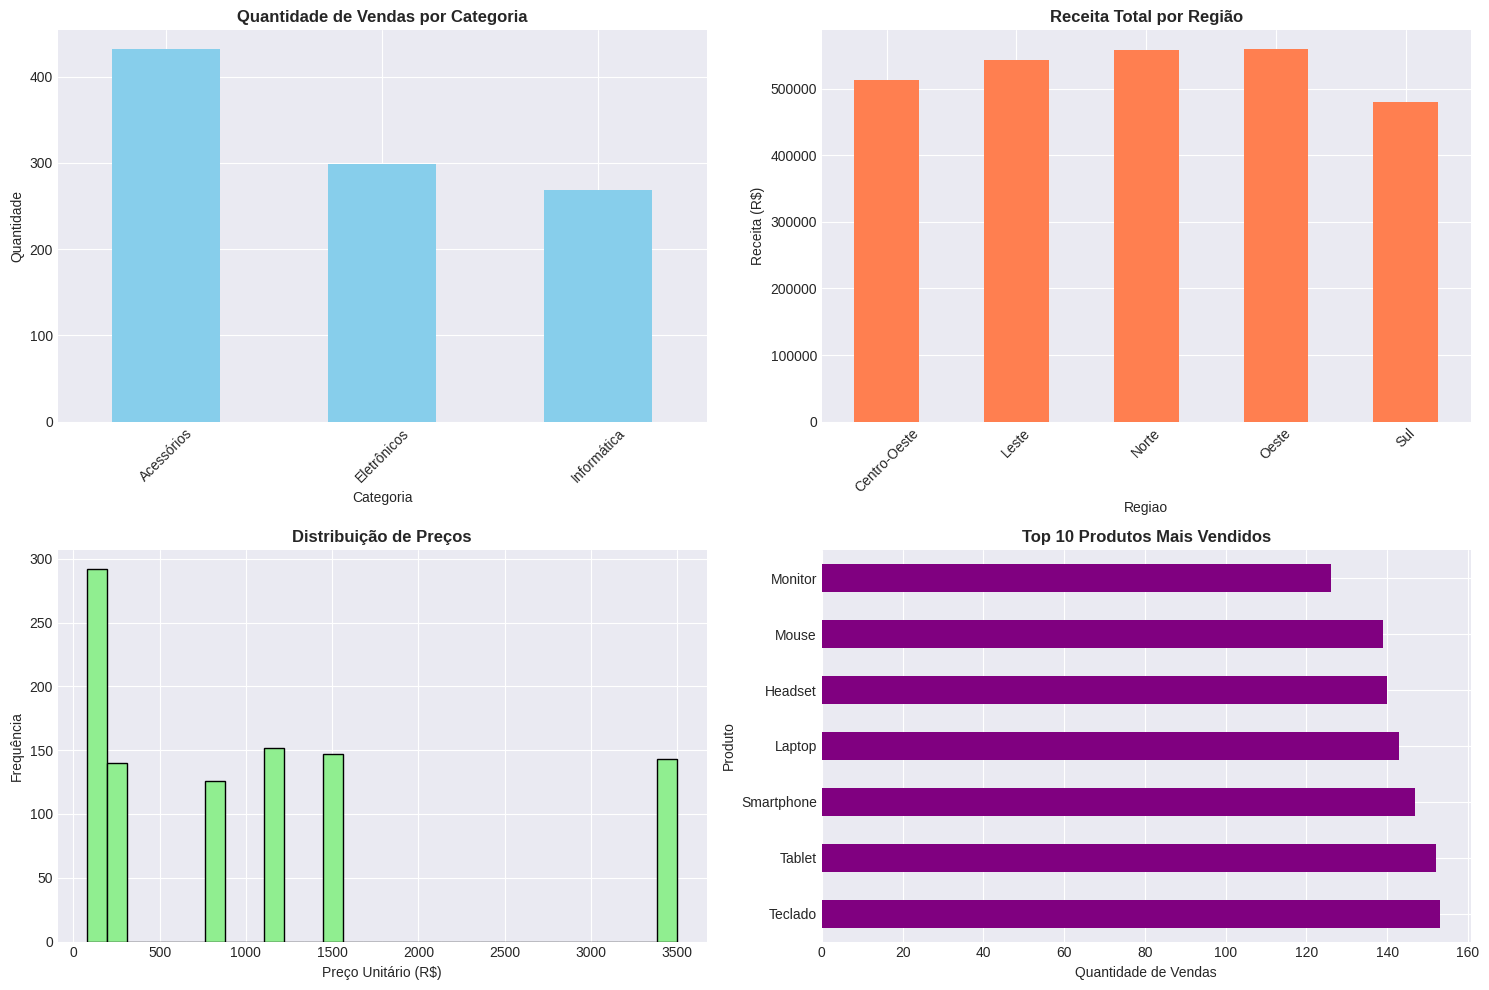

✅ Gráficos gerados com sucesso!


In [18]:
# Visualização rápida - Ajustado para os nomes reais das colunas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Vendas por Categoria (C maiúsculo)
df['Categoria'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Quantidade de Vendas por Categoria', fontweight='bold')
axes[0, 0].set_ylabel('Quantidade')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Receita por Região (R maiúsculo) e valor_total (criado na célula anterior)
df.groupby('Regiao')['valor_total'].sum().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Receita Total por Região', fontweight='bold')
axes[0, 1].set_ylabel('Receita (R$)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Distribuição de preços (P e U maiúsculos)
df['Preco_Unitario'].hist(bins=30, ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribuição de Preços', fontweight='bold')
axes[1, 0].set_xlabel('Preço Unitário (R$)')
axes[1, 0].set_ylabel('Frequência')

# Gráfico 4: Top 10 produtos (P maiúsculo)
top_produtos = df['Produto'].value_counts().head(10)
top_produtos.plot(kind='barh', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Top 10 Produtos Mais Vendidos', fontweight='bold')
axes[1, 1].set_xlabel('Quantidade de Vendas')

plt.tight_layout()

# Certifique-se de que a pasta 'images' existe no seu projeto!
plt.savefig('../images/exploracao_inicial.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos gerados com sucesso!")# Visualização rápida - Ajustado para os nomes reais das colunas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Vendas por Categoria (C maiúsculo)
df['Categoria'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Quantidade de Vendas por Categoria', fontweight='bold')
axes[0, 0].set_ylabel('Quantidade')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Receita por Região (R maiúsculo) e valor_total (criado na célula anterior)
df.groupby('Regiao')['valor_total'].sum().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Receita Total por Região', fontweight='bold')
axes[0, 1].set_ylabel('Receita (R$)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Distribuição de preços (P e U maiúsculos)
df['Preco_Unitario'].hist(bins=30, ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribuição de Preços', fontweight='bold')
axes[1, 0].set_xlabel('Preço Unitário (R$)')
axes[1, 0].set_ylabel('Frequência')

# Gráfico 4: Top 10 produtos (P maiúsculo)
top_produtos = df['Produto'].value_counts().head(10)
top_produtos.plot(kind='barh', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Top 10 Produtos Mais Vendidos', fontweight='bold')
axes[1, 1].set_xlabel('Quantidade de Vendas')

plt.tight_layout()

# Certifique-se de que a pasta 'images' existe no seu projeto!
plt.savefig('../images/exploracao_inicial.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos gerados com sucesso!")

In [19]:
# Salvar o dataframe que você limpou e criou colunas novas
# O caminho '../' sobe um nível (para notebooks) e entra em data/processed
df.to_csv('../data/processed/vendas_tratadas.csv', index=False)

print("✅ Arquivo salvo com sucesso em data/processed/vendas_tratadas.csv")

✅ Arquivo salvo com sucesso em data/processed/vendas_tratadas.csv


In [20]:
import sqlite3
from sqlalchemy import create_engine

# 1. Criar conexão com o banco de dados (o arquivo será criado automaticamente)
# O banco ficará na pasta 'sql'
engine = create_engine('sqlite:///../sql/vendas_database.db')

# 2. Salvar o DataFrame como uma tabela chamada 'vendas'
# Se a tabela já existir, ele substitui (replace)
df.to_sql('vendas', con=engine, if_exists='replace', index=False)

print("✅ Banco de dados SQLite criado e dados inseridos na tabela 'vendas'!")

✅ Banco de dados SQLite criado e dados inseridos na tabela 'vendas'!
